# # Task 5 - Sales Prediction

# Problem Statement    
    
    Sales prediction means predicting how much of a product people will buy based on factors such as the 
    amount you spend to advertise your product, the segment of people you advertise for, or the platform 
    you are advertising on about your product.Typically, a product and service-based business always need 
    their Data Scientist to predict their future sales with every step they take to manipulate the cost of 
    advertising their product. So lets start the task of sales prediction with machine learning using Python.

# Approach : 
    The classical machine learning tasks like Data Exploration, Data Cleaning, 
    Feature Engineering, Model Building and Model Testing. Using Regression 
    learning algorithms that’s best fit for the above case.

# Procedure :
    Step 1 : Import Libraries and Dataset
    
    Step 2 : Data Pre-processing
            1. Data Type and conversion
            2. Removing Irrelevant Columns
            3. Identifying & Treatment Missing Value 
            4. Identifying & Treatment Outliers
            5. Descriptive Analysis
            6. Correlation
            
    Step 3 : Data Visualization
    
    Step 4 : Multicollinearity
            
    Step 5 : Data Partition  
    
    Step 6 : Model Building
            Assumption of Model
             6.1  Linearity
             6.2  Normality
             6.3  Homoscedasicity
             6.4  Model Error has to be independently identificaly Distibuted

             Conclusion

# Step 1 :- Import Libraries and Dataset

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Oasis Infobyte Internship\Task 5\Advertising.csv")
df.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Step 2 :- Data Pre-Processing 

1. Data Type and conversion
2. Removing Irrelevant Columns
3. Identifying & Treatment Missing Value 
4. Identifying & Treatment Outliers
5. Descriptive Analysis
6. Correlation

### 2.1 Data Type and Conversion

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* All the columns are numerical except Target column

### 2.2 Removing Irrelevent Columns

In [4]:
df = df.drop('Id', axis = 1)

### 2.3 Identifying and Treatment of Missing Values

In [5]:
# count the number of NaN values in each column
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* No Missing values present in dataset

### 2.4 Identifying And Treatment of Outliers

<AxesSubplot:>

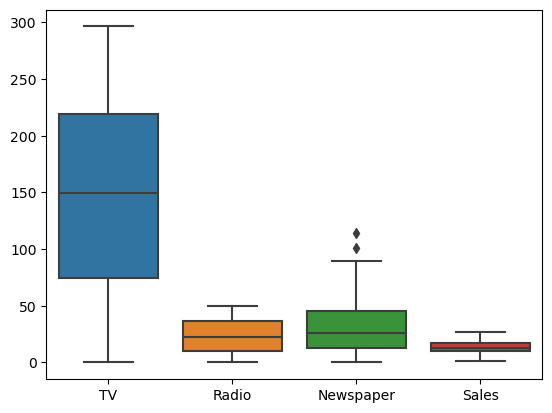

In [7]:
sns.boxplot(data=df)

### 2.4.1 Winsorizing Technique to remove outliers

In [9]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

93.625

In [12]:
df['Newspaper']=np.where(df['Newspaper'] > upper_limit,upper_limit,df['Newspaper']) # upper limit

<AxesSubplot:>

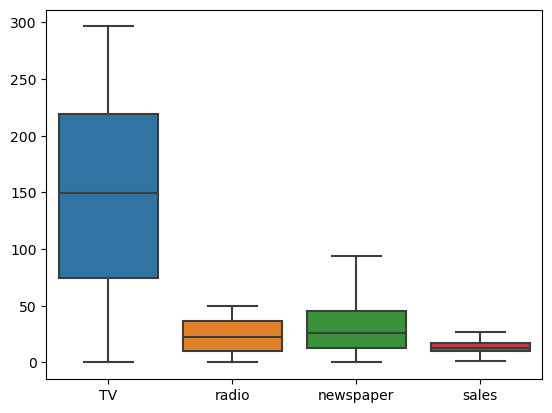

In [8]:
sns.boxplot(data=new)

### 2.5 Descriptive Analysis

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.415750,14.022500
std,85.854236,14.846809,21.316901,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,93.625000,27.000000


In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059325,0.782224
Radio,0.054809,1.000000,0.355953,0.576223
Newspaper,0.059325,0.355953,1.000000,0.231432
Sales,0.782224,0.576223,0.231432,1.000000


# Step 3 : Data Visualization 

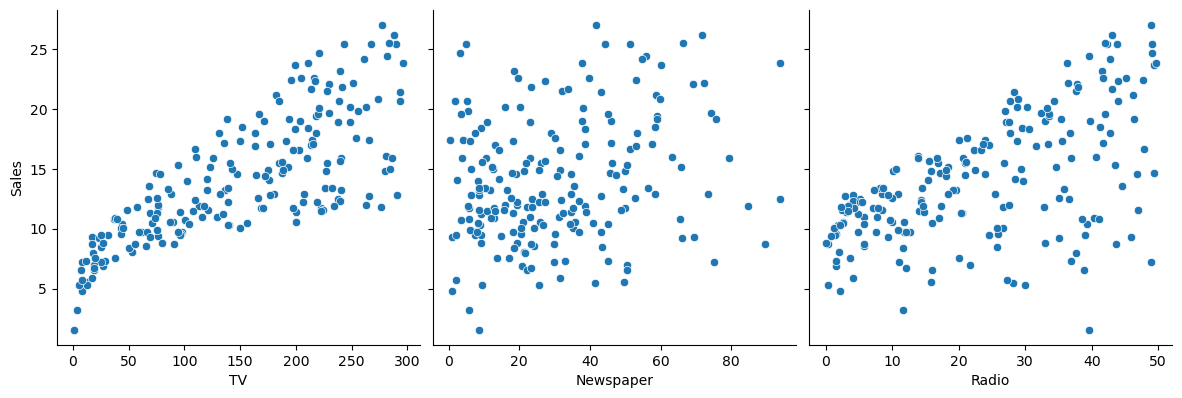

In [34]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:>

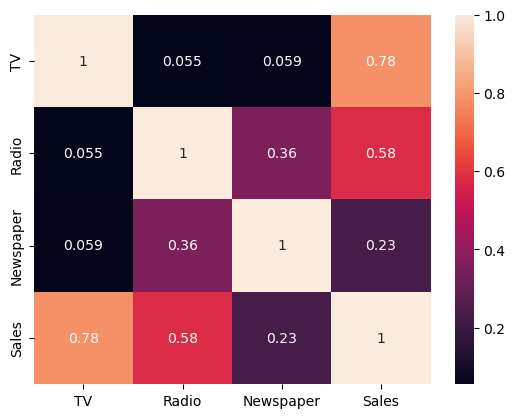

In [15]:
sns.heatmap(df.corr(),annot = True)

#### TV have 78%  strong positve correlation with Sales

* TV have high impact on Sales
* There is no colinearity in data, So every platform is independent 

# Step 4 : Multicolinearity 

In [18]:
X1=df.drop(['Sales'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

TV           2.500402
Radio        3.304735
Newspaper    3.115816
dtype: float64

# Step 5 : Data Partition

In [19]:
# Putting feature variable to X
X = df.drop('Sales', axis= 1)

# Putting response variable to y
y = df[['Sales']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

* No collinearity in the data, indicate no multi colinearity 

# Step 6 : Model Building

*  H0 :- There is no Linear relationship between sales and tv , radio & newspaper

* Vs 

*  H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05 (5%)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Sales ~ TV + Radio + Newspaper',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        20:23:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9387      0.313      9.400      0.000       2.322       3.555
TV             0.0458      0.001     32.805      0.000       0.043       0.049
Radio          0.1885      0.009     21.876      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.171      0.864      -0.013       0.011
==============================================================================
Omnibus:                       60.392   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.131
Skew:                          -1.327   Prob(JB):                     1.52e-33
Kurtosis:                       6.330   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* There is no Linear relationship between sales and NewsPaper 
* so we will remove and re-run the model 
* 90% is accuracy of model , so we say model is good fit 

In [21]:
# removing the insignificant variable 
model2=smf.ols('Sales ~ TV + Radio',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           4.83e-98
Time:                        20:24:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* 91% is accuracy of model , so we say model is good fit 
* Y = 2.9211 + 0.0458 * TV + 0.1880 * Radio

# 6.1 Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [22]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,TV,Radio,Newspaper,Sales,fitted_value,residual
0,230.1,37.8,69.2,22.1,20.555465,1.544535
1,44.5,39.3,45.1,10.4,12.345362,-1.945362
2,17.2,45.9,69.3,9.3,12.337018,-3.037018
3,151.5,41.3,58.5,18.5,17.617116,0.882884
4,180.8,10.8,58.4,12.9,13.223908,-0.323908


## 6.2 Linearity

<AxesSubplot:title={'center':'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

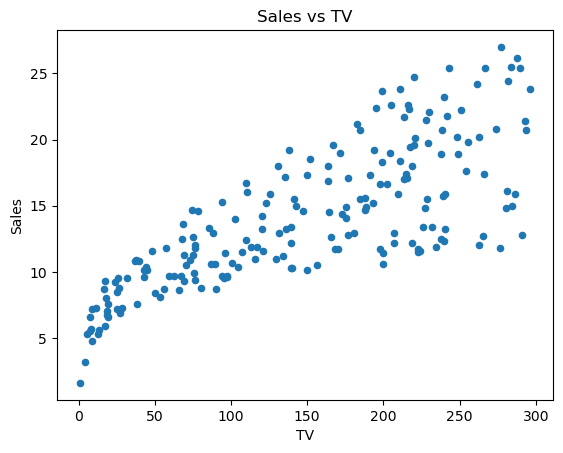

In [24]:
df.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

## 6.2 Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

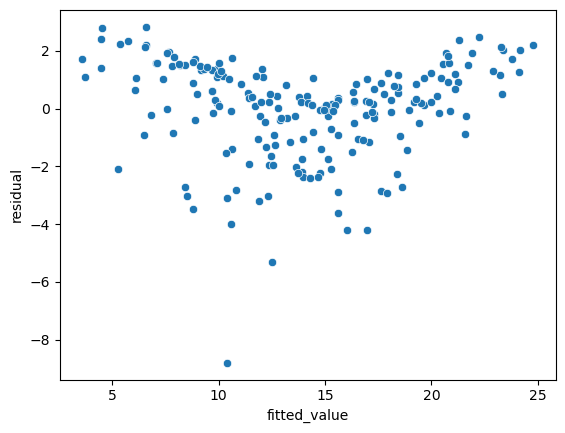

In [25]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

## 6.3 Normality

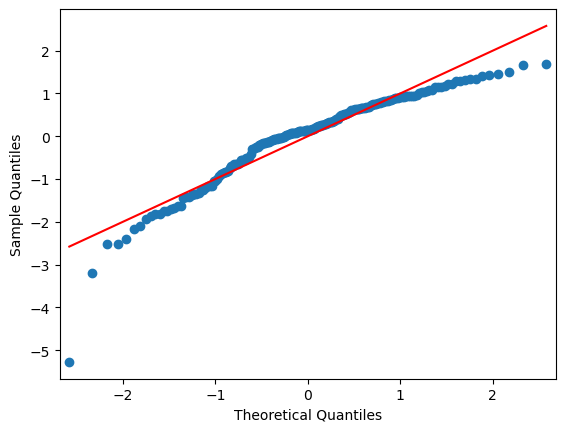

In [26]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

## 6.4 Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

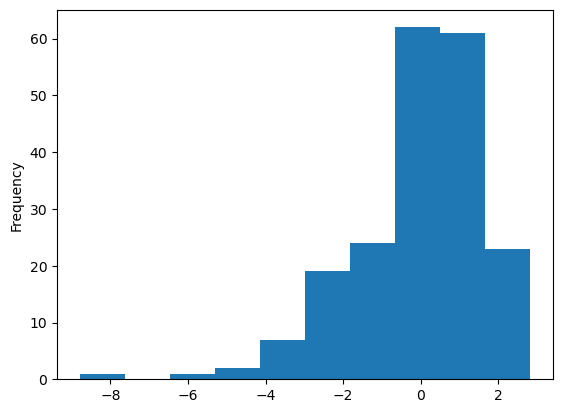

In [27]:
df['residual'].plot.hist()

### Prediction on Test Data

In [28]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,TV,Radio,Newspaper,Sales
87,110.7,40.6,63.2,16.0
118,125.7,36.9,79.2,15.9
80,76.4,26.7,22.3,11.8
198,283.6,42.0,66.2,25.5
62,239.3,15.5,27.3,15.7


In [29]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,TV,Radio,Newspaper,Sales,Prediction
87,110.7,40.6,63.2,16.0,15.618724
118,125.7,36.9,79.2,15.9,15.609467
80,76.4,26.7,22.3,11.8,11.436214
198,283.6,42.0,66.2,25.5,23.792923
62,239.3,15.5,27.3,15.7,16.784138


### Train Accuracy

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Sales, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.9


### Test Accuracy

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Sales, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.85


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# CONCLUSION

* We can conclude that we understood the statistical technique and modelling preocedure for sales prediction dataset.
* We predict 90 % accuracy on train dataset and 85 % accuracy on test dataset which is good fit.
* TV marketing has highest impact on Sales compairing to Radio and Newspaper.
* All assumptions of Linear Regression are working good in case of Sales Prediction.